# Jupyter Notebook to use trained model to classify process images

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import glob


np.random.seed(42)
tf.random.set_seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2021-12-07 18:08:27.762343: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### list existing devices; used to check if GPU is recognized

In [3]:
tf.config.get_visible_devices()

2021-12-07 18:08:31.904181: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-07 18:08:31.907667: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-07 18:08:31.966051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 18:08:31.966272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8225GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-12-07 18:08:31.966299: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-07 18:08:31.969403: I tensorflow/stream_executor/platform/d

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### function used to load and compile a saved model with its weights

In [4]:
def load_model(model_path, weight_path):
    # load json and create model
    file = open(model_path, 'r')
    model_json = file.read()
    file.close()
    loaded_model = keras.models.model_from_json(model_json)
    # load weights
    loaded_model.load_weights(weight_path)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
    loaded_model.compile(loss="binary_crossentropy", optimizer=optimizer,
                         metrics=['accuracy', 'Recall', 'Precision', 'AUC'])
    return loaded_model

### defines a model by loading a saved model and its weights

In [5]:
# load saved model trained on full data
full_model = load_model('saved_models/vgg16_full_data_v2.json', 'saved_models/vgg16_full_data_v2_weights.h5')

2021-12-07 18:08:34.766035: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-07 18:08:34.766541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 18:08:34.766675: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8225GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-12-07 18:08:34.766700: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library li

In [6]:
# load saved model trained on heavily reduced data
heavy_reduced_model = load_model('saved_models/vgg16_heavily_reduced.json',
                                 'saved_models/vgg16_heavily_reduced_weights.h5')

2021-12-07 15:01:42.865039: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-07 15:01:42.865490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 15:01:42.865631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.8225GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-12-07 15:01:42.865655: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library li

# Predictions on a single image

(224, 224, 3)

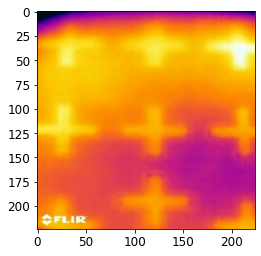

In [7]:
original = cv2.imread('data/data_predictions/MyRecord2021-11-19T125431028-from_00_49_00.00.mp4-img-44016.jpg')
rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
img = cv2.resize(rgb, (224, 224)) / 255
plt.imshow(img)
img.shape

In [8]:
image = np.array([img])
batch_size, height, width, channels = image.shape

In [9]:
inputs = keras.applications.vgg16.preprocess_input(image * 255)

In [10]:
# prediction with model trained on full data-set
Y_proba_full = full_model.predict(inputs)
print(Y_proba_full)

2021-12-05 13:57:31.877397: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-05 13:57:31.900955: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3999980000 Hz
2021-12-05 13:57:32.108672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-12-05 13:57:32.422098: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-12-05 13:57:33.359807: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-12-05 13:57:33.380595: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


(1, 1)
[[0.]]


In [11]:
# prediction with model trained on heavily reduced data-set
Y_proba_reduced = heavy_reduced_model.predict(inputs)
print(Y_proba_reduced.shape)
print(Y_proba_reduced)

(1, 1)
[[0.]]


# prediction on multiple images

#### function to load and save multiple images in a directory

In [7]:
# "data/data_predictions/OK/*.jpg"
def load_images_from_folder(file_path):
    x_data = []
    files = glob.glob(file_path)
    for myFile in files:
        i = cv2.imread(myFile)
        x_data.append(i)
    return x_data

### load images from specified folder and reshape them to fit the model (224,224)

In [8]:
images = load_images_from_folder("data/data_heavily_reduced/data/DEF/*.jpg")
images_array = np.array(images)
images_resized = tf.image.resize(images_array, [224, 224])

2021-12-07 15:02:00.118658: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1152000000 exceeds 10% of free system memory.
2021-12-07 15:02:00.578342: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3010560000 exceeds 10% of free system memory.


### Classify images from folder with loaded model

In [9]:
inputs = keras.applications.vgg16.preprocess_input(images_resized * 255)
#prediction with model trained on full data-set
Y_proba_full = full_model.predict(inputs)
print(Y_proba_full.shape)
print(Y_proba_full)

2021-12-07 15:02:15.645826: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.80GiB (rounded to 3010560000)requested by op Mul
Current allocation summary follows.
2021-12-07 15:02:15.645910: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2021-12-07 15:02:15.645943: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 30, Chunks in use: 30. 7.5KiB allocated for chunks. 7.5KiB in use in bin. 632B client-requested in use in bin.
2021-12-07 15:02:15.645969: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (512): 	Total Chunks: 3, Chunks in use: 2. 1.8KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2021-12-07 15:02:15.645991: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (1024): 	Total Chunks: 5, Chunks in use: 4. 6.5KiB allocated for chunks. 4.8KiB in use in bin. 4.0KiB client-requested in use in 

ResourceExhaustedError: OOM when allocating tensor with shape[5000,224,224,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul]